## Evaluation
Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

## Blue print

1. Check data shape and type.
2. Convert chracteristic values to numbers.
3. Split training dataset to *ourtrain* and *ourtest*.
4. Dimensionality reduction.
5. Try various models(logistic regression, decision tree, random forest, SVM, KNN, Naive Bayes).
6. Apply to the test dataset.


## 1. Data Exploration

In [30]:
# Import packages
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from scipy.special import expit
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Show all columns in pandas DataFrame
pd.set_option("display.max_columns", None)      

In [2]:
# Load dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print(train.shape)
train.head()

(900000, 33)


,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,3,3,3,1,6,1,0,7,4,0.298218,-0.919717,3.058541,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,0,2,3,0,1,0,4,6,0,-3.147667,-1.075434,2.179050,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,6,6,4,3,1,2,2,1,4,2.820733,-3.485342,-0.784235,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,0,1,6,4,2,3,3,0,3,1.081084,-2.100177,-2.343819,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,4,3,0,6,0,3,3,1,0,-0.126179,0.605033,1.133665,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


* id(int64): 0, 1, 2, ..., 899999 (ordered)
* f_00(float64): -4.59 ~ 4.74
* f_01(float64): -4.68 ~ 4.81
* f_02(float64): -4.64 ~ 4.96 
* f_03(float64): -4.65 ~ 4.45
* f_04(float64): -4.74 ~ 4.94
* f_05(float64): -4.75 ~ 4.97
* f_06(float64): -4.84 ~ 4.82
* f_07(int64): 0, 1, 2, ..., 15 (not ordered)
* f_08(int64): 0, 1, 2, ..., 16 (not ordered)
* f_09(int64): 0, 1, 2, ..., 14 (not ordered)
* f_10(int64): 0, 1, 2, ..., 14 (not ordered)
* f_11(int64): 0, 1, 2, ..., 13 (not ordered)
* f_12(int64): 0, 1, 2, ..., 16 (not ordered)
* f_13(int64): 0, 1, 2, ..., 12 (not ordered)
* f_14(int64): 0, 1, 2, ..., 14 (not ordered)
* f_15(int64): 0, 1, 2, ..., 14 (not ordered)
* f_16(int64): 0, 1, 2, ..., 15 (not ordered)
* f_17(int64): 0, 1, 2, ..., 14 (not ordered)
* f_18(int64): 0, 1, 2, ..., 13 (not ordered)
* f_19(float64): -11.28 ~ 12.07
* f_20(float64): -11.25 ~ 11.47
* f_21(float64): -13.31 ~ 14.45
* f_22(float64): -11.85 ~ 11.34
* f_23(float64): -12.30 ~ 12.24
* f_24(float64): -11.41 ~ 12.38
* f_25(float64): -11.91 ~ 12.52
* f_26(float64): -14.30 ~ 12.91
* f_27(object): 'AAAAAAABAB', ..., 'BMBDEADPAC' (-> 10 digits)
* f_28(float64): -1229.75 ~ 1229.56
* f_29(int64): 0, 1
* f_30(int64): 0, 1, 2
* target(int64): 0, 1

In [4]:
print(test.shape)
test.head()

(700000, 32)


,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
0,900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,0,0,0,5,1,1,2,2,0,1,-1.128371,2.749347,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,BAAABADLAC,99.478419,0,0
1,900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,4,0,2,1,3,0,0,0,2,0,-4.424098,1.080762,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,AFABBAEGCB,-65.993825,1,0
2,900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,4,1,1,3,2,2,4,1,0,3,-1.523864,-1.406712,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,BBACABBKEE,-87.405622,0,1
3,900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,4,2,1,5,0,3,3,1,4,2,-1.404597,3.011085,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,AEBEAACQCC,-281.293460,0,0
4,900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,2,0,0,3,0,1,2,0,2,2,-1.968516,0.100594,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,AEBBBBDABF,25.629415,0,2


In [5]:
train["target"].value_counts()

0    462161
1    437839
Name: target, dtype: int64

#### - Correlation

In [6]:
cor = round(train.corr(), 2)
# cor[((cor > 0.4) | (cor < -0.4)) & (cor != 1)].count()  # no correlation was found

## 2. Numerize *f_27* column

In [7]:
# Check categorical means before proceeding
train.groupby("f_27").mean()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,target
f_27,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAAAAAABAB,202653.0,0.957887,-1.284478,1.379345,1.189851,-0.054777,-1.382964,-0.755519,1.0,2.0,0.0,4.0,7.0,1.0,7.0,1.0,2.0,1.0,4.0,5.0,-1.221429,0.860184,-2.077908,1.582369,-0.020285,-1.917049,0.115874,-6.903443,231.139924,0.0,0.0,0.0
AAAAAAABAC,378487.0,1.212514,0.053393,-0.204789,-1.094622,-0.192677,-0.194913,1.373335,2.0,4.0,0.0,5.0,3.0,2.0,2.0,7.0,1.0,0.0,2.0,0.0,3.917313,0.487382,0.789795,1.191337,2.019059,3.488488,0.412705,0.932727,-116.777037,0.0,2.0,0.0
AAAAAAACAB,549114.0,0.431447,-1.129222,0.492832,0.304130,-0.333223,-0.029821,1.779790,4.0,3.0,2.0,4.0,6.0,2.0,3.0,3.0,1.0,0.0,8.0,2.0,-1.263358,-0.873145,0.113798,-0.157273,4.288482,-2.904971,-1.745038,-1.974924,188.590956,0.0,0.0,0.0
AAAAAAAEAA,19052.0,-0.562865,1.267448,1.207971,-0.018508,-1.565793,-1.746601,1.006371,0.0,1.0,1.0,1.0,3.0,5.0,3.0,4.0,1.0,0.0,1.0,1.0,-0.054453,-1.809019,-3.578063,-0.031663,-2.134586,-5.141280,4.668590,4.692285,279.201865,0.0,2.0,0.0
AAAAAAAEDE,149763.0,0.488868,-0.711647,-0.848438,2.051462,0.036544,0.474993,0.076021,3.0,1.0,4.0,2.0,2.0,0.0,1.0,1.0,1.0,4.0,3.0,0.0,4.216841,-2.797567,-1.057840,-9.964029,-1.658830,1.500818,-2.659704,2.115437,283.429553,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BLBCAAAIBD,442128.0,0.433664,-0.020613,-0.315746,0.551980,-0.262754,0.015910,0.232677,0.0,5.0,1.0,0.0,0.0,3.0,2.0,2.0,0.0,2.0,5.0,0.0,1.392813,-1.196302,1.934514,-0.466950,-3.390553,1.184817,2.798803,2.209411,368.425618,0.0,0.0,0.0
BLBCBBELDC,507163.0,1.453514,1.056128,-0.277299,0.117818,-0.164796,0.377741,-0.433180,1.0,2.0,2.0,1.0,1.0,6.0,3.0,0.0,1.0,2.0,0.0,2.0,1.515484,-1.429957,1.423744,0.499106,-0.613761,1.582238,-2.535053,0.697027,-68.513644,1.0,0.0,0.0
BLBFBBBJDC,838689.0,0.540856,0.296709,-0.793442,-3.012123,-0.284970,-0.341019,-1.270182,0.0,4.0,2.0,0.0,4.0,1.0,6.0,1.0,1.0,4.0,2.0,1.0,3.163585,-1.167505,-1.444005,-0.944610,-2.653502,-2.261654,-1.645269,2.126344,-463.921486,1.0,1.0,0.0


In [8]:
# Return 'n'th character
def nth_char(column, n):
    count = 1
    nth = []
    for characters in column:
        for char in characters:
            if count == n:
                nth.append(char)
                count = 1
                break
            else:
                count += 1

    return nth

In [9]:
# Split the letters
f_27_01 = np.array(nth_char(train.f_27, 1))
f_27_02 = np.array(nth_char(train.f_27, 2))
f_27_03 = np.array(nth_char(train.f_27, 3))
f_27_04 = np.array(nth_char(train.f_27, 4))
f_27_05 = np.array(nth_char(train.f_27, 5))
f_27_06 = np.array(nth_char(train.f_27, 6))
f_27_07 = np.array(nth_char(train.f_27, 7))
f_27_08 = np.array(nth_char(train.f_27, 8))
f_27_09 = np.array(nth_char(train.f_27, 9))
f_27_10 = np.array(nth_char(train.f_27, 10))

In [10]:
# Create DataFrame
dff_27 = pd.DataFrame({"f_27_01":f_27_01, "f_27_02":f_27_02, "f_27_03":f_27_03, "f_27_04":f_27_04, 
                "f_27_05":f_27_05, "f_27_06":f_27_06, "f_27_07":f_27_07, "f_27_08":f_27_08, 
                "f_27_09":f_27_09, "f_27_10":f_27_10})

In [11]:
print(dff_27.shape)
dff_27.head()

(900000, 10)


,f_27_01,f_27_02,f_27_03,f_27_04,f_27_05,f_27_06,f_27_07,f_27_08,f_27_09,f_27_10
0,A,B,A,B,D,A,D,B,A,B
1,A,C,A,C,C,A,D,C,E,B
2,A,A,A,E,A,B,C,K,A,D
3,B,D,B,B,A,A,C,B,C,B
4,B,D,B,C,B,B,C,H,F,E


In [12]:
# Data Investigate
print("f_27_01: ", dff_27.f_27_01.unique())
print("f_27_02: ", dff_27.f_27_02.unique())
print("f_27_03: ", dff_27.f_27_03.unique())
print("f_27_04: ", dff_27.f_27_04.unique())
print("f_27_05: ", dff_27.f_27_05.unique())
print("f_27_06: ", dff_27.f_27_06.unique())
print("f_27_07: ", dff_27.f_27_07.unique())
print("f_27_08: ", dff_27.f_27_08.unique())
print("f_27_09: ", dff_27.f_27_09.unique())
print("f_27_10: ", dff_27.f_27_10.unique())

f_27_01:  ['A' 'B']
f_27_02:  ['B' 'C' 'A' 'D' 'E' 'G' 'F' 'H' 'I' 'J' 'K' 'L' 'M' 'N']
f_27_03:  ['A' 'B']
f_27_04:  ['B' 'C' 'E' 'D' 'H' 'I' 'G' 'A' 'F' 'J' 'K' 'L' 'M' 'N' 'O']
f_27_05:  ['D' 'C' 'A' 'B' 'F' 'E' 'G' 'I' 'H' 'J' 'K' 'L' 'M' 'O']
f_27_06:  ['A' 'B']
f_27_07:  ['D' 'C' 'A' 'E' 'B' 'G' 'H' 'F' 'I' 'J' 'M' 'K' 'L' 'N' 'O']
f_27_08:  ['B' 'C' 'K' 'H' 'E' 'P' 'D' 'A' 'S' 'T' 'J' 'Q' 'N' 'R' 'G' 'M' 'F' 'O'
 'I' 'L']
f_27_09:  ['A' 'E' 'C' 'F' 'D' 'H' 'B' 'G' 'I' 'J' 'L' 'K' 'M' 'N' 'O']
f_27_10:  ['B' 'D' 'E' 'A' 'C' 'K' 'F' 'G' 'H' 'J' 'I' 'L' 'M' 'N' 'O']


In [13]:
# Numerize the split dataframe
def to_num(df):
    ref = {"A":1, "B":2, "C":3, "D":4, "E":5, "F":6, "G":7, "H":8, "I":9, "J":10, "K":11, "L":12, 
    "M":13, "N":14, "O":15, "P":16, "Q":17, "R":18, "S":19, "T":20, "U":21, "V":22, "W":23, "X":24,
    "Y":25, "Z":26}

    df = ref[df]
    return df

dff_27 = dff_27.applymap(to_num) 
dff_27.head()

,f_27_01,f_27_02,f_27_03,f_27_04,f_27_05,f_27_06,f_27_07,f_27_08,f_27_09,f_27_10
0,1,2,1,2,4,1,4,2,1,2
1,1,3,1,3,3,1,4,3,5,2
2,1,1,1,5,1,2,3,11,1,4
3,2,4,2,2,1,1,3,2,3,2
4,2,4,2,3,2,2,3,8,6,5


In [14]:
# Combine with training dataset
train = pd.concat([train, dff_27], axis=1)
train = train.drop(columns=['f_27'])
train.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,target,f_27_01,f_27_02,f_27_03,f_27_04,f_27_05,f_27_06,f_27_07,f_27_08,f_27_09,f_27_10
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,3,3,3,1,6,1,0,7,4,0.298218,-0.919717,3.058541,-2.540739,0.766952,-2.730628,-0.208177,1.363402,67.609153,0,0,0,1,2,1,2,4,1,4,2,1,2
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,0,2,3,0,1,0,4,6,0,-3.147667,-1.075434,2.179050,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,377.096415,0,0,1,1,3,1,3,3,1,4,3,5,2
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,6,6,4,3,1,2,2,1,4,2.820733,-3.485342,-0.784235,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,-195.599702,0,2,1,1,1,1,5,1,2,3,11,1,4
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,0,1,6,4,2,3,3,0,3,1.081084,-2.100177,-2.343819,0.572594,-1.653213,1.686035,-2.533098,-0.608601,210.826205,0,0,1,2,4,2,2,1,1,3,2,3,2
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,4,3,0,6,0,3,3,1,0,-0.126179,0.605033,1.133665,-3.912929,-1.430366,2.127649,-3.306784,4.371371,-217.211798,0,1,1,2,4,2,3,2,2,3,8,6,5


In [15]:
train.groupby("target").mean()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,f_27_01,f_27_02,f_27_03,f_27_04,f_27_05,f_27_06,f_27_07,f_27_08,f_27_09,f_27_10
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,449952.885748,-0.054026,-0.052336,-0.029808,-0.001181,-0.000726,-0.031878,0.000230,2.022985,2.002516,2.254182,2.234382,1.920904,2.844024,2.290827,1.537953,2.035007,2.15336,1.855901,2.081552,0.506407,-0.093217,-0.472851,-0.165649,-0.563376,-0.543354,0.253796,0.215607,-8.706582,0.321912,0.986137,1.547424,3.084250,1.699494,3.095287,2.301914,1.448930,3.464983,9.783655,2.844225,3.035819
1,450048.703679,0.056439,0.057638,0.033877,-0.001566,-0.000407,0.034234,-0.001701,2.040405,2.116561,2.476693,2.117740,1.679352,2.840631,2.185893,1.490125,2.170930,2.03692,1.861280,2.047798,0.100037,-0.268994,0.177821,0.155789,-0.164769,-0.130977,0.095011,0.507462,8.407323,0.370730,1.020090,1.447185,2.840894,1.636949,2.877400,2.475846,1.487426,3.285721,10.990001,3.211630,3.545237


## 3. Dimensionality Reduction (PCA)

### 3-1. Standardize Data

In [16]:
# Drop 'target' and 'id'
attributes = train.drop(columns=["target", "id"])
# centered = attributes - attributes.mean()       # mean centering only
centered = (attributes - attributes.mean())/attributes.std()
# print(centered.var())
centered.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,f_27_01,f_27_02,f_27_03,f_27_04,f_27_05,f_27_06,f_27_07,f_27_08,f_27_09,f_27_10
0,-1.374489,0.237914,-0.244424,0.568674,-0.647036,0.839147,0.113849,-0.622798,1.849206,-0.831914,0.499628,0.778288,0.089417,-0.805874,3.299935,-0.701763,-1.343902,3.503148,1.236509,-0.004531,-0.308681,1.293854,-1.032915,0.463197,-1.000398,-0.159178,0.406221,0.284747,-0.726815,-1.224258,-0.997321,-0.644413,-1.421884,-0.619729,1.243387,-0.937278,0.375802,-1.467208,-1.264419,-0.776771
1,1.699197,-1.712871,-2.230359,-0.544197,1.113558,-1.552653,0.448561,-0.622798,0.592099,0.999916,-1.323025,0.127876,0.089417,-1.455889,-0.378664,-1.339074,1.219923,2.821798,-1.319755,-1.492375,-0.373550,0.939893,0.933406,-0.107687,-0.366301,-1.637903,-0.167974,1.580904,-0.726815,-1.224258,-0.997321,0.022778,-1.421884,0.006711,0.472758,-0.937278,0.375802,-1.291926,1.235714,-0.776771
2,1.683885,0.616078,-1.028334,0.811718,-0.608414,0.113695,-0.707991,-0.622798,-1.293562,-0.221304,2.322280,2.729524,0.656685,0.494156,-0.378664,-0.064453,-0.061989,-0.584951,1.236509,1.084625,-1.377471,-0.252717,-0.561655,-0.061588,0.139767,1.080692,-1.640164,-0.817592,-0.726815,1.217776,-0.997321,-1.311604,-1.421884,1.259589,-1.068500,1.066918,-0.228162,0.110336,-1.264419,0.433488
3,-0.118017,-0.589476,-0.805397,2.087825,0.371514,-0.129132,-0.281882,0.584806,-0.036455,-0.831914,-1.323025,-0.522536,1.791221,1.144171,0.357056,0.572858,0.578967,-1.266301,0.597443,0.333490,-0.800438,-0.880391,0.237420,-0.523254,0.849947,-1.121098,-0.390219,0.884552,-0.726815,-1.224258,1.002685,0.689969,0.703291,-0.619729,-1.068500,-0.937278,-0.228162,-1.467208,-0.014353,-0.776771
4,1.150047,-0.177876,-0.665703,-1.099782,0.468368,0.499895,0.408249,0.584806,0.592099,-1.442524,1.107178,0.778288,-1.612388,2.444201,-1.114384,0.572858,0.578967,-0.584951,-1.319755,-0.187775,0.326501,0.519165,-1.592810,-0.432422,1.034959,-1.441205,1.621061,-0.908105,-0.726815,-0.003241,1.002685,0.689969,0.703291,0.006711,-0.297871,1.066918,-0.228162,-0.415512,1.860747,1.038617


### 3-2. Eigenvalues and Eigenvectors

In [17]:
# Covariance Matrix
cov = np.dot(centered.T, centered)/(len(centered)-1)
df_cov = pd.DataFrame(cov)
df_cov.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,1.000000,-0.000303,0.001899,-0.000841,-0.000544,0.000305,-0.001312,0.000831,-0.002553,0.000078,0.000627,0.001131,-0.000196,0.000586,0.001111,-0.001298,-0.000544,0.000199,-0.001019,0.000372,-0.000023,0.001069,-0.001079,0.000269,0.001895,0.000509,0.000117,0.189369,0.000274,-0.000996,0.000235,-0.000685,-0.000720,-0.000760,0.001450,-0.001436,0.000045,-0.001796,-0.000134,-0.001201
1,-0.000303,1.000000,0.000501,-0.000833,-0.000832,0.000636,-0.000441,-0.001220,-0.000292,-0.000566,0.001240,0.001565,-0.001031,-0.000512,0.000292,-0.000508,-0.001192,0.000007,0.000341,-0.000877,0.001204,-0.001635,-0.000462,-0.000646,-0.000970,-0.000115,0.002033,0.193940,-0.000556,-0.000070,-0.002322,-0.002583,0.000254,0.001721,-0.001454,-0.000375,0.000569,-0.001881,-0.000395,-0.000083
2,0.001899,0.000501,1.000000,0.000792,0.000067,-0.001109,0.000894,0.001206,0.000339,0.001718,0.001146,-0.001822,0.001916,-0.002856,0.000251,0.000395,-0.001464,0.000896,-0.000535,-0.001172,0.000918,-0.000215,-0.000319,-0.000018,-0.000003,-0.000894,0.000574,0.209182,-0.001451,-0.000023,0.000082,0.000335,0.001339,-0.001131,-0.000697,-0.000868,-0.000372,0.000395,0.000281,0.000664
3,-0.000841,-0.000833,0.000792,1.000000,0.001049,0.002768,-0.001092,0.001114,-0.000124,0.000484,-0.000240,0.002122,0.001023,-0.001552,-0.000281,-0.002340,-0.000069,0.001437,0.001515,0.001420,0.000853,-0.000082,0.000503,0.001413,0.002854,0.001784,0.000713,0.328895,-0.000624,0.000239,-0.001446,-0.000889,0.001202,-0.001008,-0.000542,-0.000071,0.000257,0.000167,-0.000840,-0.000742
4,-0.000544,-0.000832,0.000067,0.001049,1.000000,0.000194,-0.000312,0.001227,-0.000251,0.002478,-0.003559,0.000270,0.001543,-0.001316,0.001035,0.000802,-0.000947,-0.000232,0.000427,0.000606,0.000405,0.000366,0.001751,-0.002201,0.000601,-0.001981,-0.000520,0.170484,-0.001122,0.000475,0.000092,0.002632,0.000880,-0.002735,-0.000038,-0.000906,-0.001082,-0.001669,-0.000341,0.001286


In [18]:
# Eigenvalues & Eigenvectors
eig = np.linalg.eig(cov)
print('<eigenvalues>\n', eig[0],'\n')
print('<eigenvectors>\n', eig[1])

<eigenvalues>
 [2.06155345 1.81984597 1.75430281 1.60833202 0.39299269 0.49897894
 0.55604552 1.32822964 0.59897266 1.27547893 1.25621199 1.22117752
 0.69281247 0.69871147 1.11750903 1.11196461 0.7536505  1.07715803
 0.78307789 0.80923508 0.82612637 0.83593377 0.84646001 0.84969011
 0.86868781 0.87086922 0.88994405 0.89752527 0.90779179 0.92777187
 0.92562023 0.95302468 0.97870015 1.00672656 0.99560423 1.00286852
 0.99892349 0.99925151 1.00141114 1.000828  ] 

<eigenvectors>
 [[-2.52955931e-04  2.32796768e-03 -1.31908931e-03 ...  2.92912072e-01
  -5.38177365e-01  8.65595678e-02]
 [-3.18841091e-03  3.39419076e-04  7.31743138e-04 ... -4.07950864e-01
   2.05398357e-01 -7.63494833e-01]
 [ 5.55321684e-05  6.23447223e-03  1.26966042e-03 ... -2.03764933e-01
   1.34274746e-02  3.24927817e-01]
 ...
 [ 7.62252978e-03 -2.14027192e-02  2.55196662e-01 ...  1.54347748e-02
   3.23117076e-04 -1.15605347e-02]
 [-1.63492079e-02  1.17983614e-01  1.58032020e-02 ... -2.12066031e-03
  -1.66347617e-03  7.099

### 3-3. Contribution in the Data

In [19]:
def percent_variation(n):
    '''Percent Variation of top 'n' factors'''
    trace = sum(eig[0])    # sum of all eigenvalues
    contribution = [i/trace for i in eig[0]]
    return contribution[:n]    # return the first n number of contributions

n = 5
# print(percent_variation(n))
print('Total contribution of 5 components:', round(sum(percent_variation(n)),4)*100, '%\n')

m = 20
# print(percent_variation(m))
print('Total contribution of 20 components:', round(sum(percent_variation(m)),4)*100, '%')

Total contribution of 5 components: 19.09 %

Total contribution of 20 components: 53.54 %


### 3-4.  Fit to PCA (getting a projection matrix)

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(attributes)

# How much each of the features influence the PC
k = pd.DataFrame(pca.components_, columns=list(attributes.columns))
k.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,f_27_01,f_27_02,f_27_03,f_27_04,f_27_05,f_27_06,f_27_07,f_27_08,f_27_09,f_27_10
0,0.000792,0.000812,0.000877,0.001378,0.000714,0.001239,0.000690,0.000007,-0.000001,-0.000005,-0.000008,9.009450e-07,0.000010,-0.000010,0.000007,-0.000015,-0.000008,0.000005,-0.000014,0.000003,0.000008,-8.740367e-07,4.027393e-07,-0.000001,-0.000012,0.000008,0.000003,0.999997,-0.000003,0.000003,5.001432e-07,0.000008,-5.491545e-08,-0.000005,-0.000001,-0.000003,3.953506e-07,-0.000011,-0.000003,-0.000015
1,-0.000316,-0.000328,0.000074,0.000046,-0.000280,0.000203,-0.000044,0.002035,0.000908,0.001979,-0.001194,-7.548681e-04,0.000863,-0.000182,-0.000535,0.001637,-0.000918,-0.000583,0.001538,0.034742,-0.033750,-2.655799e-02,4.137793e-02,-0.014197,-0.062886,0.048958,-0.072118,0.000010,0.000701,0.015805,1.042971e-03,0.000330,9.307909e-04,-0.002288,0.000155,0.000738,-6.805235e-04,0.991564,0.000443,0.002484
2,-0.000315,0.000266,-0.000261,-0.000141,0.000284,0.000216,0.000187,-0.003732,-0.003935,-0.005985,0.005455,5.619652e-03,-0.001009,0.000469,0.001209,-0.004881,0.000893,0.001199,-0.000165,-0.028370,-0.085940,-4.931586e-01,4.596744e-01,-0.485592,-0.131425,0.475443,-0.202336,-0.000007,-0.000807,0.094229,-6.651615e-04,0.002244,-9.908970e-04,0.009047,-0.001419,-0.000298,7.764614e-03,-0.089203,-0.003016,-0.009644
3,-0.000128,-0.000567,-0.000288,-0.000460,0.000080,-0.000459,0.000538,0.005855,0.004910,0.007839,-0.007679,-7.724131e-03,0.004646,-0.003597,-0.001168,0.004703,-0.003321,-0.002381,0.000444,0.207081,-0.587518,-1.619637e-01,-3.546431e-02,0.319399,-0.231649,-0.230691,-0.607282,0.000006,0.000151,-0.028811,1.010277e-03,-0.002319,7.798795e-04,-0.012195,0.000629,-0.000513,-7.284515e-03,-0.072675,0.004929,0.010172
4,0.000038,-0.000094,-0.000603,-0.000379,-0.000376,0.000535,0.000841,-0.010868,-0.000098,-0.019145,0.007152,5.749056e-03,-0.007737,0.006586,0.001114,-0.008434,0.004470,0.004080,-0.002623,0.472265,-0.305431,3.722566e-01,-1.814458e-01,-0.189061,-0.499393,0.335665,0.333838,-0.000009,-0.000709,0.007677,-1.762720e-03,0.004169,-3.460419e-03,0.012584,-0.001621,-0.001390,1.576938e-02,-0.035997,-0.000261,-0.018322


### 3-5. Projection (transforming the original data via projection matrix)

In [21]:
data_pca = pca.transform(attributes)
data_pca_df = pd.DataFrame(data_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
data_pca_df.head()

,PC1,PC2,PC3,PC4,PC5
0,67.990337,-8.447170,-2.620328,0.992871,3.435397
1,377.472639,-7.493296,-0.912796,1.205774,-1.596709
2,-195.217030,1.184682,2.090912,4.177835,1.642719
3,211.207978,-8.304496,1.389221,2.623216,-1.699805
4,-216.830430,-3.193099,-4.554402,-3.015874,0.032300


### cf) Choosing the number of components

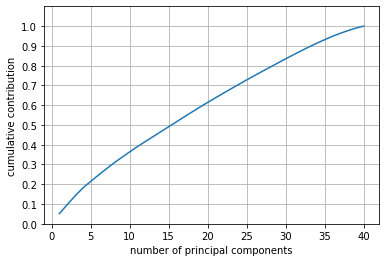

In [22]:
pca = PCA().fit(centered)

x = np.arange(1,41)
y = np.cumsum(pca.explained_variance_ratio_)

fig = plt.figure(figsize = (6, 4))
plt.plot(x, y)
plt.xlabel('number of principal components', fontsize=10)
plt.ylabel('cumulative contribution', fontsize=10)

plt.ylim(0, 1.1)
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.grid()
plt.show()

### 3-6. Conclusion from PCA

=> Cumulative contribution is inceasing relatively monotonously. We conclude that dimension reduction is efficient.

## 4. Split training dataset

In [23]:
# # Split 'train' into features(X) and target(y)
# X = train.drop(columns=["id", "target"])
# y = train["target"]
# print(X.shape, y.shape)



# Split each of features(X) and target(y) into train and target
X = train.drop(columns=["id", "target"])
y = train["target"]
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3, stratify=train["target"])
print(Xtr.shape, ytr.shape, Xte.shape, yte.shape)
Xtr.head()

(630000, 40) (630000,) (270000, 40) (270000,)


,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,f_27_01,f_27_02,f_27_03,f_27_04,f_27_05,f_27_06,f_27_07,f_27_08,f_27_09,f_27_10
467775,-1.725559,0.523183,-0.001808,-0.589901,-0.896413,0.802165,0.379138,1,3,3,3,3,1,2,4,1,1,0,0,-0.513718,0.801755,-2.211438,-1.652744,-2.770389,-0.004815,-1.055202,2.867015,321.403110,0,0,1,2,2,3,3,1,2,18,5,9
349924,1.730284,0.608266,0.010170,-0.346527,-0.856718,3.763628,-0.245677,1,1,3,1,2,2,2,1,0,2,3,2,-3.199244,-1.664254,-1.987606,0.138104,-3.120819,2.756724,6.314276,-0.605297,368.303334,0,1,1,6,1,4,2,2,3,10,3,3
329812,0.493508,-1.154743,1.149247,0.173423,1.889000,0.832485,-0.762587,3,0,0,2,1,2,5,2,2,1,2,1,-0.177577,1.204068,2.085873,-2.510299,-0.224355,2.812383,-0.674152,3.210562,47.505633,1,0,2,3,2,3,3,1,1,8,4,6
5667,1.030651,-0.914908,-0.390447,-0.974247,-0.335435,0.779565,0.204574,3,4,1,2,0,4,5,0,6,1,0,4,-2.201297,1.652114,2.989100,-3.785293,1.244759,0.139237,0.419401,0.275082,75.199382,0,1,2,1,1,2,3,1,2,1,4,3
43658,0.082138,-0.092989,-2.048266,0.280954,-0.706677,-0.413576,-0.148541,2,3,2,2,3,3,3,3,1,3,1,2,-0.914467,-0.877287,0.874758,-1.095053,5.675659,0.068646,-4.527007,-3.329507,-482.002044,1,2,2,2,2,3,3,1,5,11,2,2


## 5. Try Various ML Models

### 5-1. Logistic Regression

In [24]:
# Fit the data
logreg = LogisticRegression()
logreg.fit(Xtr, ytr)

/Users/lucy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
# Predict
ypr_lo = logreg.predict(Xte)
error_logreg = metrics.roc_auc_score(yte, ypr_lo)   # AUC(area under curve) of ROC curve
print(ypr_lo)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(error_logreg))

[0 0 0 ... 1 0 0]
Accuracy of logistic regression classifier on test set: 0.67


### 5-2. Decision Tree

In [26]:
# Fit the model
dectree = tree.DecisionTreeClassifier(max_depth=10)
dectree = dectree.fit(Xtr, ytr)

In [27]:
ypr_de = dectree.predict(Xte)
error_dectree = metrics.roc_auc_score(yte, ypr_de)   # AUC(area under curve) of ROC curve
print(ypr_de)
print('Accuracy of decision tree on test set: {:.2f}'.format(error_dectree))

[0 0 0 ... 1 1 0]
Accuracy of decision tree on test set: 0.74


### 5-3. Random Forest

In [28]:
# Fit the data
randfore = RandomForestClassifier(max_depth=10, random_state=0, max_samples=100000)
randfore.fit(Xtr, ytr)

RandomForestClassifier(max_depth=10, max_samples=100000, random_state=0)

In [31]:
ypr_rf = randfore.predict(Xte)
error_randfore = metrics.roc_auc_score(yte, ypr_rf)   # AUC(area under curve) of ROC curve
print(ypr_rf)
print('Accuracy of random forest on test set: {:.2f}'.format(error_randfore))

[0 0 0 ... 0 0 0]
Accuracy of random forest on test set: 0.80


### 5-4. SVM

In [31]:
# Fit
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(Xtr, ytr)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [32]:
# Predict
ypr_svm = svm.predict(Xte)
error_svm = metrics.roc_auc_score(yte, ypr_svm)   # AUC(area under curve) of ROC curve
print(ypr_svm)
print('Accuracy of SVM on test set: {:.2f}'.format(error_svm))

[0 0 0 ... 1 0 0]
Accuracy of SVM on test set: 0.88


### 5-5. KNN

### 5-6. Naive Bayes

## 6. Apply to the test dataset